# Sieci neuronowe i deep learning - Lab 2

# MLP w Tensorflow

## Cwiczenie 1

- Zaimportuj zbiór danych korzystając z funkcji tf.keras.datasets.mnist.load_data: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

- przejrzyj dane, sprawdź ich wymiary, jakie wartości przyjmują. Czy trzeba je normalizować?

- Wyświetl kilka obrazów metodą plt.imshow()


Wymiary zbioru treningowego (obrazy): (60000, 28, 28)
Wymiary zbioru testowego (obrazy): (10000, 28, 28)
Wymiary etykiet zbioru treningowego: (60000,)
Wymiary etykiet zbioru testowego: (10000,)
Zakres wartości pikseli w zbiorze treningowym: 0 do 255
Zakres wartości pikseli po normalizacji: 0.0 do 1.0


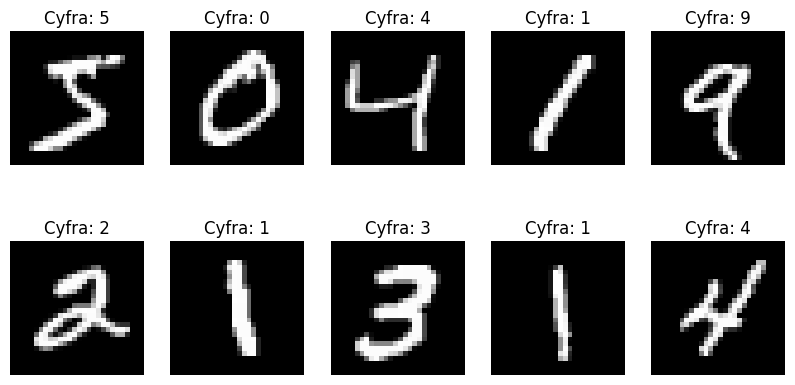

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import numpy as np

# Zaimportowanie zbioru danych MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Przeglądanie wymiarów danych
print("Wymiary zbioru treningowego (obrazy):", x_train.shape)
print("Wymiary zbioru testowego (obrazy):", x_test.shape)
print("Wymiary etykiet zbioru treningowego:", y_train.shape)
print("Wymiary etykiet zbioru testowego:", y_test.shape)

# Zakres wartości pikseli
print("Zakres wartości pikseli w zbiorze treningowym:", np.min(x_train), "do", np.max(x_train))

# Normalizacja danych (jeśli zakres wartości pikseli to 0-255, warto je przeskalować do zakresu 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0
print("Zakres wartości pikseli po normalizacji:", np.min(x_train), "do", np.max(x_train))

# Wyświetlenie kilku obrazów
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Cyfra: {y_train[i]}")
    plt.axis('off')
plt.show()


## Ćwiczenie 2

 - Stwórz sieć neuronową MLP jako obiekt klasy Sequential z dobranymi przez siebie warstwami gęstymi: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential, https://www.tensorflow.org/api_docs/python/tf/keras/layers
  - Stwórz odpowiednie obiekty optimizer (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers), loss (https://www.tensorflow.org/api_docs/python/tf/keras/losses) oraz metrics (https://www.tensorflow.org/api_docs/python/tf/keras/metrics) i skompiluj model metodą compile (https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)
 - Wyświetl strukturę modelu metodą summary

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Tworzenie modelu MLP
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Przekształcenie obrazu 28x28 na wektor 784 elementów
    layers.Dense(128, activation='relu'),  # Pierwsza warstwa gęsta z 128 neuronami i aktywacją ReLU
    layers.Dense(64, activation='relu'),   # Druga warstwa gęsta z 64 neuronami i aktywacją ReLU
    layers.Dense(10, activation='softmax') # Warstwa wyjściowa z 10 neuronami i aktywacją softmax (klasyfikacja)
])

# Ustawienia optymalizatora, funkcji kosztu i metryk
optimizer = optimizers.Adam(learning_rate=0.001)  # Użycie optymalizatora Adam z domyślnym LR
loss = losses.SparseCategoricalCrossentropy()     # Funkcja kosztu dla problemu klasyfikacji wieloklasowej
metric = [metrics.SparseCategoricalAccuracy()]    # Metryka: dokładność dla etykiet całkowitych

# Kompilowanie modelu
model.compile(optimizer=optimizer, loss=loss, metrics=metric)

# Wyświetlanie struktury modelu
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Ćwiczenie 3

- Wytrenuj model, korzystając z metody fit (https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit). Ustaw odpowiednią liczbę epoch, rozmiar paczki i odsetek danych przeznaczonych do walidacji, zapisuj wyniki w obiekcie "history"
 
 - Narysuj wykresy zmian metryk oraz funkcji straty w kolejnych epokach, zarówno dla zbioru treningowego jak i walidacyjnego
 
 - Wykonaj ewaluację swojego modelu dla zbioru testowego (https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate)
 

Epoch 1/10

1500/1500 [==============================] - 4s 2ms/step - loss: 0.2691 - sparse_categorical_accuracy: 0.9211 - val_loss: 0.1458 - val_sparse_categorical_accuracy: 0.9572
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1153 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.1224 - val_sparse_categorical_accuracy: 0.9634
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0783 - sparse_categorical_accuracy: 0.9758 - val_loss: 0.0936 - val_sparse_categorical_accuracy: 0.9722
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0586 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.0920 - val_sparse_categorical_accuracy: 0.9725
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.1039 - val_sparse_categorical_accuracy: 0.9737
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0354 - spar

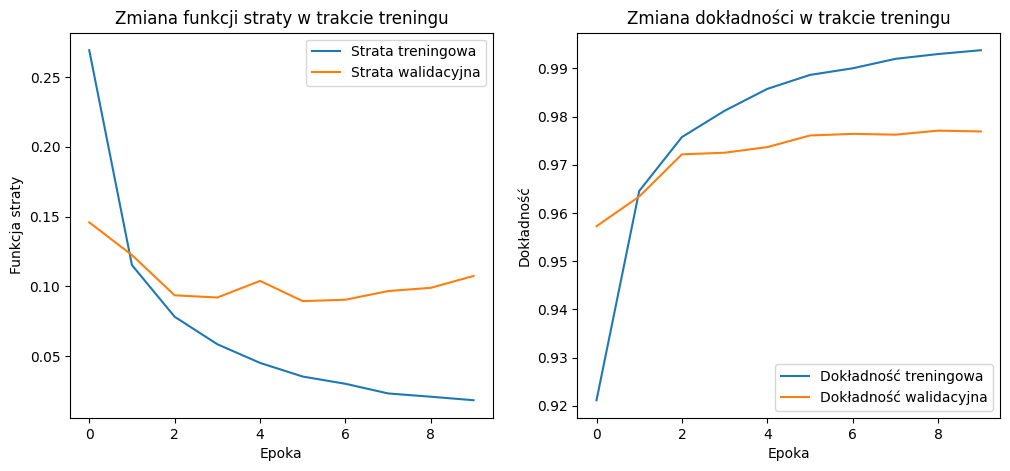

313/313 [==============================] - 0s 1ms/step - loss: 0.0911 - sparse_categorical_accuracy: 0.9765
Wyniki na zbiorze testowym - Strata: 0.0911, Dokładność: 0.9765


In [3]:
# Trening modelu
history = model.fit(
    x_train, y_train,
    epochs=10,                # Liczba epok
    batch_size=32,            # Rozmiar paczki
    validation_split=0.2,     # 20% danych treningowych na walidację
    verbose=1                 # Włączony widok postępu treningu
)

# Wykresy zmian metryk i funkcji straty
plt.figure(figsize=(12, 5))

# Wykres funkcji straty
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Funkcja straty')
plt.title('Zmiana funkcji straty w trakcie treningu')
plt.legend()

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Dokładność walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.title('Zmiana dokładności w trakcie treningu')
plt.legend()

plt.show()

# Ewaluacja modelu na zbiorze testowym
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Wyniki na zbiorze testowym - Strata: {test_loss:.4f}, Dokładność: {test_accuracy:.4f}")


## Ćwiczenie 4

 - Zaimplementuj podobny model sieci neuronowej, definiując klasę dziedziczącą po klasie tensorflow.keras.Model. Możesz sparametryzować swój model
 
 - powtórz dla tego modelu/modeli kroki kompilacji, uczenia oraz raportowania wyników. Porównaj rezultaty z modelem z poprzedniego ćwiczenia

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2672 - sparse_categorical_accuracy: 0.9211 - val_loss: 0.1466 - val_sparse_categorical_accuracy: 0.9579
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1107 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.1186 - val_sparse_categorical_accuracy: 0.9621
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0750 - sparse_categorical_accuracy: 0.9770 - val_loss: 0.0994 - val_sparse_categorical_accuracy: 0.9678
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0575 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.0985 - val_sparse_categorical_accuracy: 0.9707
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0449 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.0947 - val_sparse_categorical_accuracy: 0.9720
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0352 - spars

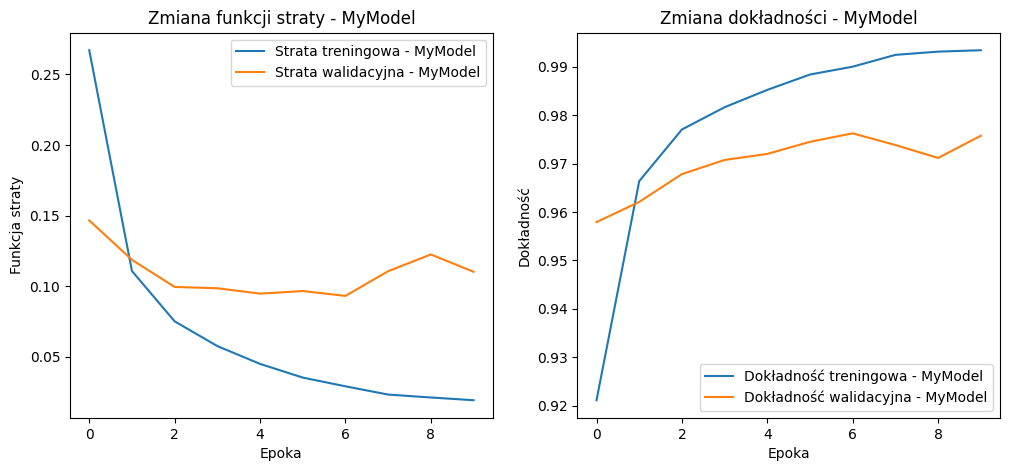

313/313 [==============================] - 0s 966us/step - loss: 0.0892 - sparse_categorical_accuracy: 0.9777
Wyniki na zbiorze testowym dla MyModel - Strata: 0.0892, Dokładność: 0.9777

Porównanie:
Model Sequential - Strata testowa: 0.0911, Dokładność testowa: 0.9765
Model MyModel   - Strata testowa: 0.0892, Dokładność testowa: 0.9777


In [4]:
import tensorflow as tf
from tensorflow.keras import Model, layers
import matplotlib.pyplot as plt

# Definicja klasy MyModel
class MyModel(Model):
    def __init__(self, hidden_units=(128, 64)):
        super(MyModel, self).__init__()
        self.flatten = layers.Flatten()
        self.hidden_layers = [layers.Dense(units, activation='relu') for units in hidden_units]
        self.output_layer = layers.Dense(10, activation='softmax')

    def call(self, inputs, training=False):
        x = self.flatten(inputs)
        for layer in self.hidden_layers:
            x = layer(x)
        return self.output_layer(x)

# Tworzenie i kompilacja modelu
hidden_units = (128, 64)  # Parametryzacja liczby neuronów
custom_model = MyModel(hidden_units=hidden_units)
custom_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# Trening modelu
history_custom = custom_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Wykresy dla modelu MyModel
plt.figure(figsize=(12, 5))

# Wykres funkcji straty
plt.subplot(1, 2, 1)
plt.plot(history_custom.history['loss'], label='Strata treningowa - MyModel')
plt.plot(history_custom.history['val_loss'], label='Strata walidacyjna - MyModel')
plt.xlabel('Epoka')
plt.ylabel('Funkcja straty')
plt.title('Zmiana funkcji straty - MyModel')
plt.legend()

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(history_custom.history['sparse_categorical_accuracy'], label='Dokładność treningowa - MyModel')
plt.plot(history_custom.history['val_sparse_categorical_accuracy'], label='Dokładność walidacyjna - MyModel')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.title('Zmiana dokładności - MyModel')
plt.legend()

plt.show()

# Ewaluacja na zbiorze testowym dla MyModel
test_loss_custom, test_accuracy_custom = custom_model.evaluate(x_test, y_test, verbose=1)
print(f"Wyniki na zbiorze testowym dla MyModel - Strata: {test_loss_custom:.4f}, Dokładność: {test_accuracy_custom:.4f}")

# Porównanie wyników
print("\nPorównanie:")
print(f"Model Sequential - Strata testowa: {test_loss:.4f}, Dokładność testowa: {test_accuracy:.4f}")
print(f"Model MyModel   - Strata testowa: {test_loss_custom:.4f}, Dokładność testowa: {test_accuracy_custom:.4f}")


## Ćwiczenie 5

 - Stwórz i dodaj do swojego modelu funkcje "Callback" (np. EarlyStopping, ReduceLROnPlateau): https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
 - Powtórz uczenie i porównaj wyniki z poprzednimi

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0164 - sparse_categorical_accuracy: 0.9946 - val_loss: 0.1225 - val_sparse_categorical_accuracy: 0.9747 - lr: 0.0010
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0164 - sparse_categorical_accuracy: 0.9943 - val_loss: 0.1269 - val_sparse_categorical_accuracy: 0.9733 - lr: 0.0010
Epoch 3/20
1472/1500 [============================>.] - ETA: 0s - loss: 0.0134 - sparse_categorical_accuracy: 0.9954
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0134 - sparse_categorical_accuracy: 0.9954 - val_loss: 0.1228 - val_sparse_categorical_accuracy: 0.9746 - lr: 0.0010
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0037 - sparse_categorical_accuracy: 0.9990 - val_loss: 0.1050 - val_sparse_categorical_accuracy: 0.9812 - lr: 5.0000e-04
Epoch 5/20
1500/1500 [============

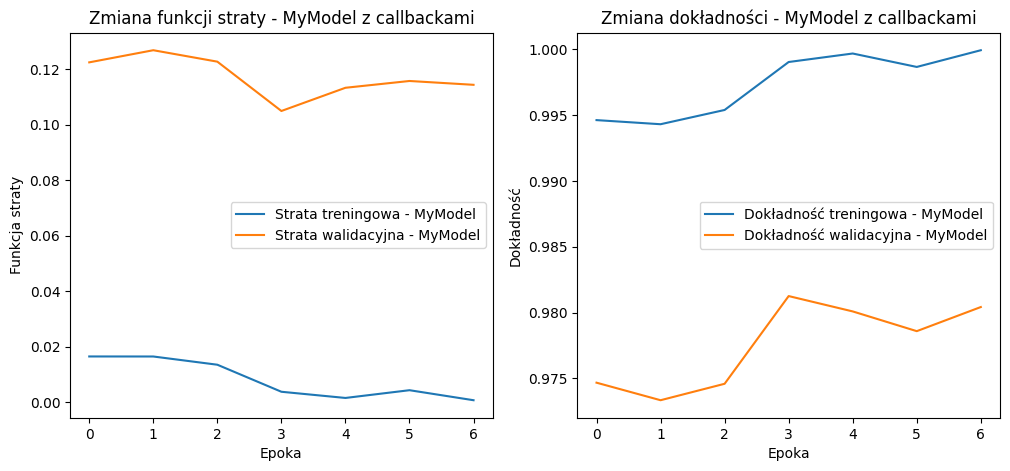

313/313 [==============================] - 0s 1ms/step - loss: 0.0891 - sparse_categorical_accuracy: 0.9812
Wyniki na zbiorze testowym dla MyModel z callbackami - Strata: 0.0891, Dokładność: 0.9812

Porównanie wyników z callbackami:
Model Sequential - Strata testowa: 0.0911, Dokładność testowa: 0.9765
Model MyModel bez callbacków - Strata testowa: 0.0892, Dokładność testowa: 0.9777
Model MyModel z callbackami  - Strata testowa: 0.0891, Dokładność testowa: 0.9812


In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Konfiguracja callbacków
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Trening modelu MyModel z callbackami
history_custom_with_callbacks = custom_model.fit(
    x_train, y_train,
    epochs=20,               # Maksymalna liczba epok - dzięki EarlyStopping może zakończyć się wcześniej
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Wykresy dla modelu MyModel z callbackami
plt.figure(figsize=(12, 5))

# Wykres funkcji straty
plt.subplot(1, 2, 1)
plt.plot(history_custom_with_callbacks.history['loss'], label='Strata treningowa - MyModel')
plt.plot(history_custom_with_callbacks.history['val_loss'], label='Strata walidacyjna - MyModel')
plt.xlabel('Epoka')
plt.ylabel('Funkcja straty')
plt.title('Zmiana funkcji straty - MyModel z callbackami')
plt.legend()

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(history_custom_with_callbacks.history['sparse_categorical_accuracy'], label='Dokładność treningowa - MyModel')
plt.plot(history_custom_with_callbacks.history['val_sparse_categorical_accuracy'], label='Dokładność walidacyjna - MyModel')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.title('Zmiana dokładności - MyModel z callbackami')
plt.legend()

plt.show()

# Ewaluacja na zbiorze testowym dla MyModel z callbackami
test_loss_custom_cb, test_accuracy_custom_cb = custom_model.evaluate(x_test, y_test, verbose=1)
print(f"Wyniki na zbiorze testowym dla MyModel z callbackami - Strata: {test_loss_custom_cb:.4f}, Dokładność: {test_accuracy_custom_cb:.4f}")

# Porównanie wyników
print("\nPorównanie wyników z callbackami:")
print(f"Model Sequential - Strata testowa: {test_loss:.4f}, Dokładność testowa: {test_accuracy:.4f}")
print(f"Model MyModel bez callbacków - Strata testowa: {test_loss_custom:.4f}, Dokładność testowa: {test_accuracy_custom:.4f}")
print(f"Model MyModel z callbackami  - Strata testowa: {test_loss_custom_cb:.4f}, Dokładność testowa: {test_accuracy_custom_cb:.4f}")
